## Feature engineering. 
This is the notebook for feature engineering. We start by looking at how the data looks now.

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Libraries imported successfully!")

Libraries imported successfully!


In [8]:
# Define paths
processed_data_dir = Path('../data/processed')

# List all processed files
processed_files = list(processed_data_dir.glob('*_processed.csv'))
print(f"Found {len(processed_files)} processed data files:")
for file in processed_files:
    print(f"  - {file.name}")

# Load all data into a dictionary
data_dict = {}
for file_path in processed_files:
    data_type = file_path.stem.replace('_processed', '')
    print(f"\nLoading {data_type}...")
    
    try:
        df = pd.read_csv(file_path)
        # Convert datetime column
        df['datetime'] = pd.to_datetime(df['datetime'])
        data_dict[data_type] = df
        print(f"  ✓ Loaded {len(df)} records")
        print(f"  ✓ Date range: {df['datetime'].min()} to {df['datetime'].max()}")
        print(f"  ✓ Columns: {list(df.columns)}")
    except Exception as e:
        print(f"  ✗ Error loading {data_type}: {e}")

print(f"\nSuccessfully loaded {len(data_dict)} datasets")

Found 4 processed data files:
  - water_height_processed.csv
  - flow_rate_processed.csv
  - wind_direction_processed.csv
  - flow_direction_processed.csv

Loading water_height...
  ✓ Loaded 558038 records
  ✓ Date range: 2015-01-01 00:00:00 to 2025-07-03 00:00:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y', 'NUMERIEKEWAARDE_normalized', 'X_normalized', 'Y_normalized', 'datetime_unix_normalized']

Loading flow_rate...
  ✓ Loaded 26270 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 11:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y', 'NUMERIEKEWAARDE_normalized', 'X_normalized', 'Y_normalized', 'datetime_unix_normalized']

Loading wind_direction...
  ✓ Loaded 26171 records
  ✓ Date range: 2025-01-01 00:00:00 to 2025-07-02 10:30:00
  ✓ Columns: ['datetime', 'datetime_unix', 'NUMERIEKEWAARDE', 'X', 'Y', 'NUMERIEKEWAARDE_normalized', 'X_normalized', 'Y_normalized', 'datetime_unix_normalized']

Loading flow_direction...
  ✓ L

In [9]:
# Display overview of each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*60}")
    print(f"DATASET: {data_type.upper()}")
    print(f"{'='*60}")
    
    print(f"Shape: {df.shape}")
    print(f"\nFirst few rows:")
    print(df.head())
    
    print(f"\nData types:")
    print(df.dtypes)
    
    print(f"\nBasic statistics for NUMERIEKEWAARDE:")
    print(df['NUMERIEKEWAARDE'].describe())
    
    print(f"\nMissing values:")
    print(df.isnull().sum())


DATASET: WATER_HEIGHT
Shape: (558038, 9)

First few rows:
             datetime  datetime_unix  NUMERIEKEWAARDE              X  \
0 2015-01-01 00:00:00   1.420067e+09             91.0  603100.219284   
1 2015-01-01 00:10:00   1.420067e+09             91.0  603100.219284   
2 2015-01-01 00:20:00   1.420068e+09             90.0  603100.219284   
3 2015-01-01 00:30:00   1.420069e+09             88.0  603100.219284   
4 2015-01-01 00:40:00   1.420069e+09             84.0  603100.219284   

              Y  NUMERIEKEWAARDE_normalized  X_normalized  Y_normalized  \
0  5.813724e+06                    1.725945      0.999999      0.999999   
1  5.813724e+06                    1.725945      0.999999      0.999999   
2  5.813724e+06                    1.708172      0.999999      0.999999   
3  5.813724e+06                    1.672625      0.999999      0.999999   
4  5.813724e+06                    1.601531      0.999999      0.999999   

   datetime_unix_normalized  
0                 -1.740716

In [10]:
# Analyze each dataset
for data_type, df in data_dict.items():
    print(f"\n{'='*50}")
    print(f"DATA QUALITY: {data_type.upper()}")
    print(f"{'='*50}")
    
    # Temporal coverage
    print(f"Temporal Coverage:")
    print(f"  Start: {df['datetime'].min()}")
    print(f"  End: {df['datetime'].max()}")
    print(f"  Duration: {df['datetime'].max() - df['datetime'].min()}")
    
    # Check for gaps in time series
    df_sorted = df.sort_values('datetime')
    time_diff = df_sorted['datetime'].diff()
    print(f"  Average time interval: {time_diff.mean()}")
    print(f"  Max time gap: {time_diff.max()}")
    
    # Value distribution
    print(f"\nValue Distribution:")
    print(f"  Min: {df['NUMERIEKEWAARDE'].min():.2f}")
    print(f"  Max: {df['NUMERIEKEWAARDE'].max():.2f}")
    print(f"  Mean: {df['NUMERIEKEWAARDE'].mean():.2f}")
    print(f"  Std: {df['NUMERIEKEWAARDE'].std():.2f}")
    
    # Check for outliers
    mean_val = df['NUMERIEKEWAARDE'].mean()
    std_val = df['NUMERIEKEWAARDE'].std()
    outliers = df[(df['NUMERIEKEWAARDE'] < mean_val - 3*std_val) | 
                   (df['NUMERIEKEWAARDE'] > mean_val + 3*std_val)]
    print(f"  Outliers (>3σ): {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    # Check for duplicate timestamps
    duplicates = df.duplicated(subset=['datetime']).sum()
    print(f"  Duplicate timestamps: {duplicates}")


DATA QUALITY: WATER_HEIGHT
Temporal Coverage:
  Start: 2015-01-01 00:00:00
  End: 2025-07-03 00:00:00
  Duration: 3836 days 00:00:00
  Average time interval: 0 days 00:09:53.921908403
  Max time gap: 0 days 00:10:00

Value Distribution:
  Min: -141.00
  Max: 271.00
  Mean: -6.11
  Std: 56.26
  Outliers (>3σ): 27 (0.0%)
  Duplicate timestamps: 0

DATA QUALITY: FLOW_RATE
Temporal Coverage:
  Start: 2025-01-01 00:00:00
  End: 2025-07-02 11:30:00
  Duration: 182 days 11:30:00
  Average time interval: 0 days 00:10:00.182724884
  Max time gap: 0 days 00:30:00

Value Distribution:
  Min: -49.60
  Max: 128.18
  Mean: 30.06
  Std: 24.41
  Outliers (>3σ): 133 (0.5%)
  Duplicate timestamps: 0

DATA QUALITY: WIND_DIRECTION
Temporal Coverage:
  Start: 2025-01-01 00:00:00
  End: 2025-07-02 10:30:00
  Duration: 182 days 10:30:00
  Average time interval: 0 days 00:10:02.315628582
  Max time gap: 0 days 04:40:00

Value Distribution:
  Min: 0.00
  Max: 359.90
  Mean: 173.20
  Std: 103.66
  Outliers (>3

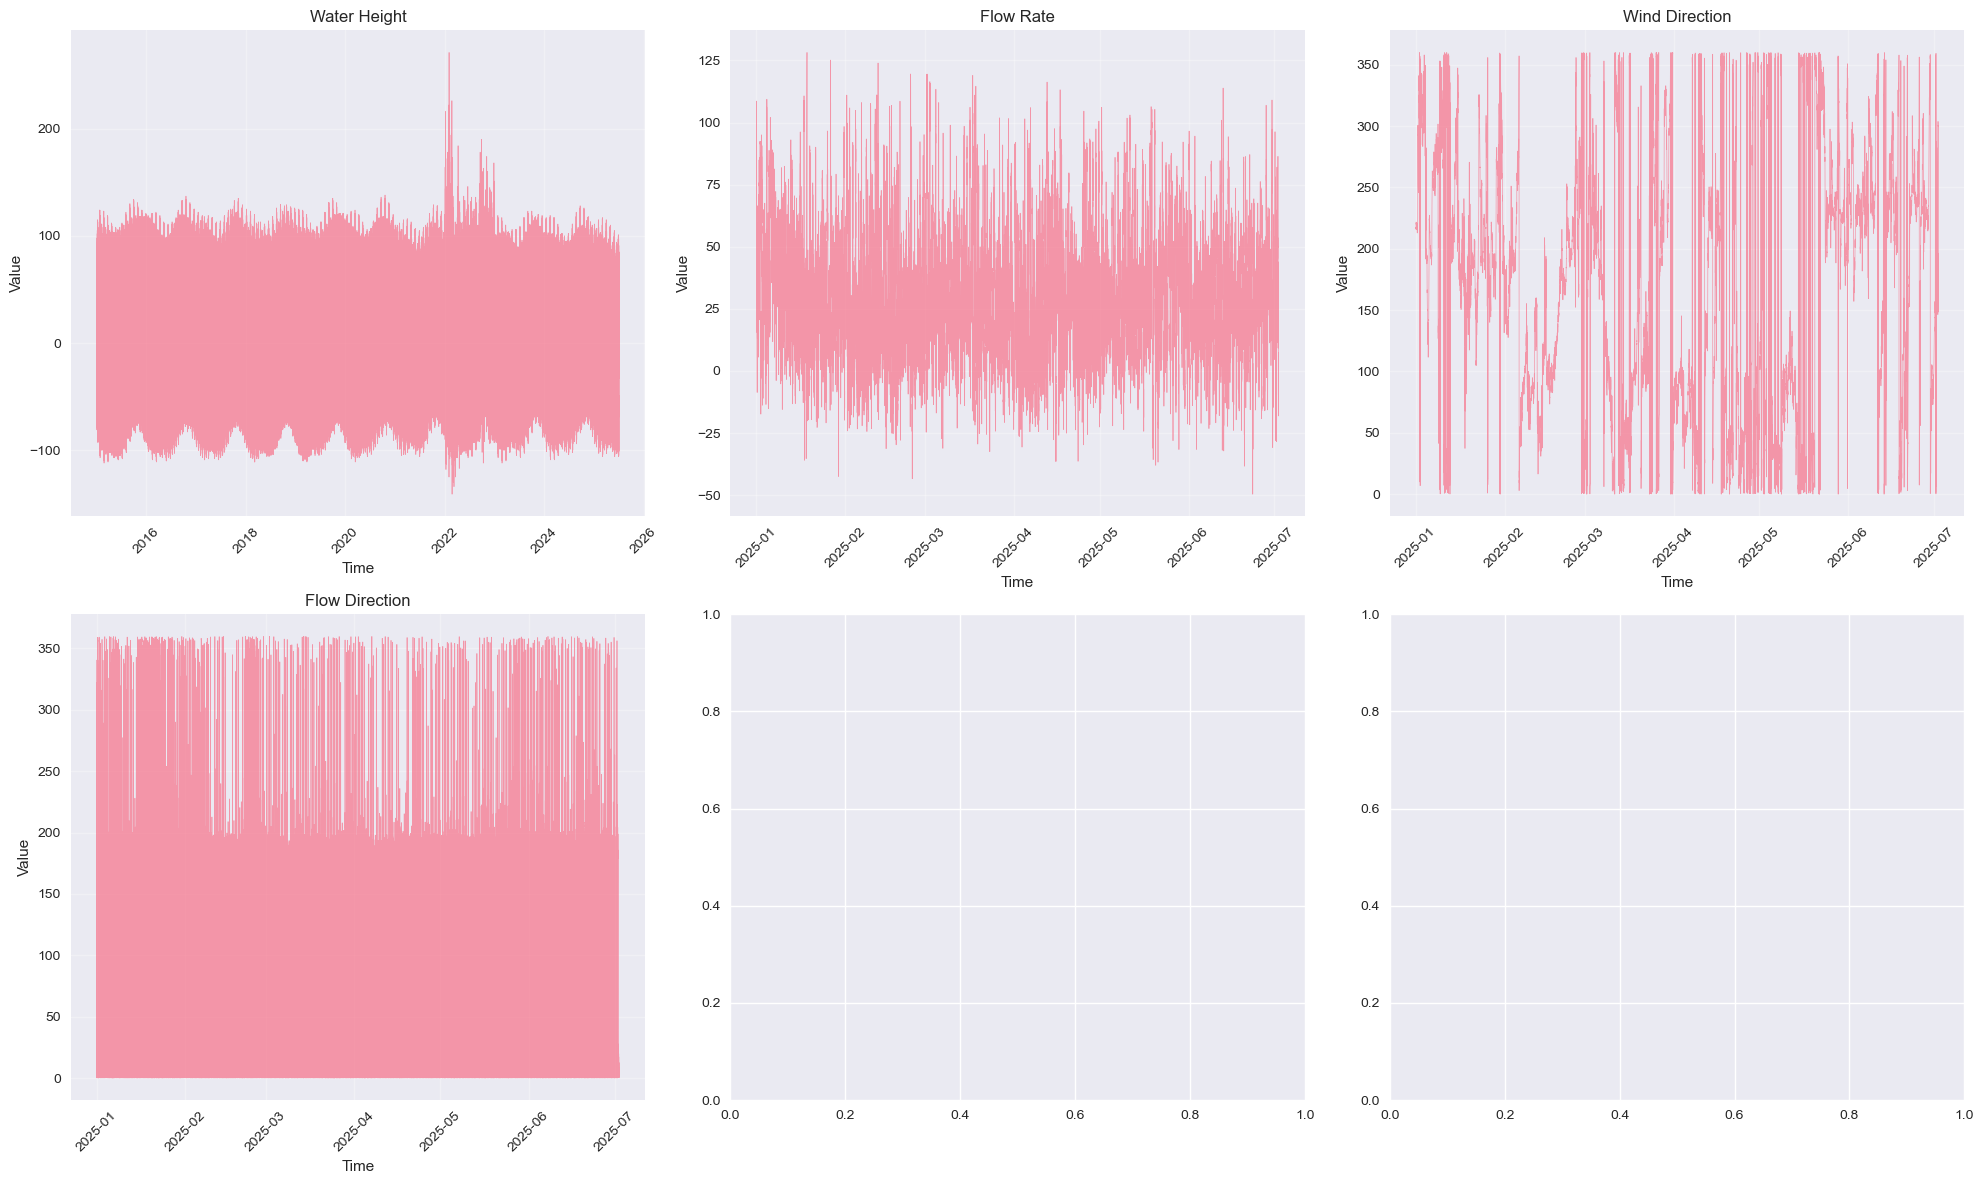

In [11]:
# Visualizations for each dataset
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    # Time series plot
    ax.plot(df['datetime'], df['NUMERIEKEWAARDE'], alpha=0.7, linewidth=0.5)
    ax.set_title(f'{data_type.replace("_", " ").title()}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.tick_params(axis='x', rotation=45)
    
    # Add grid
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

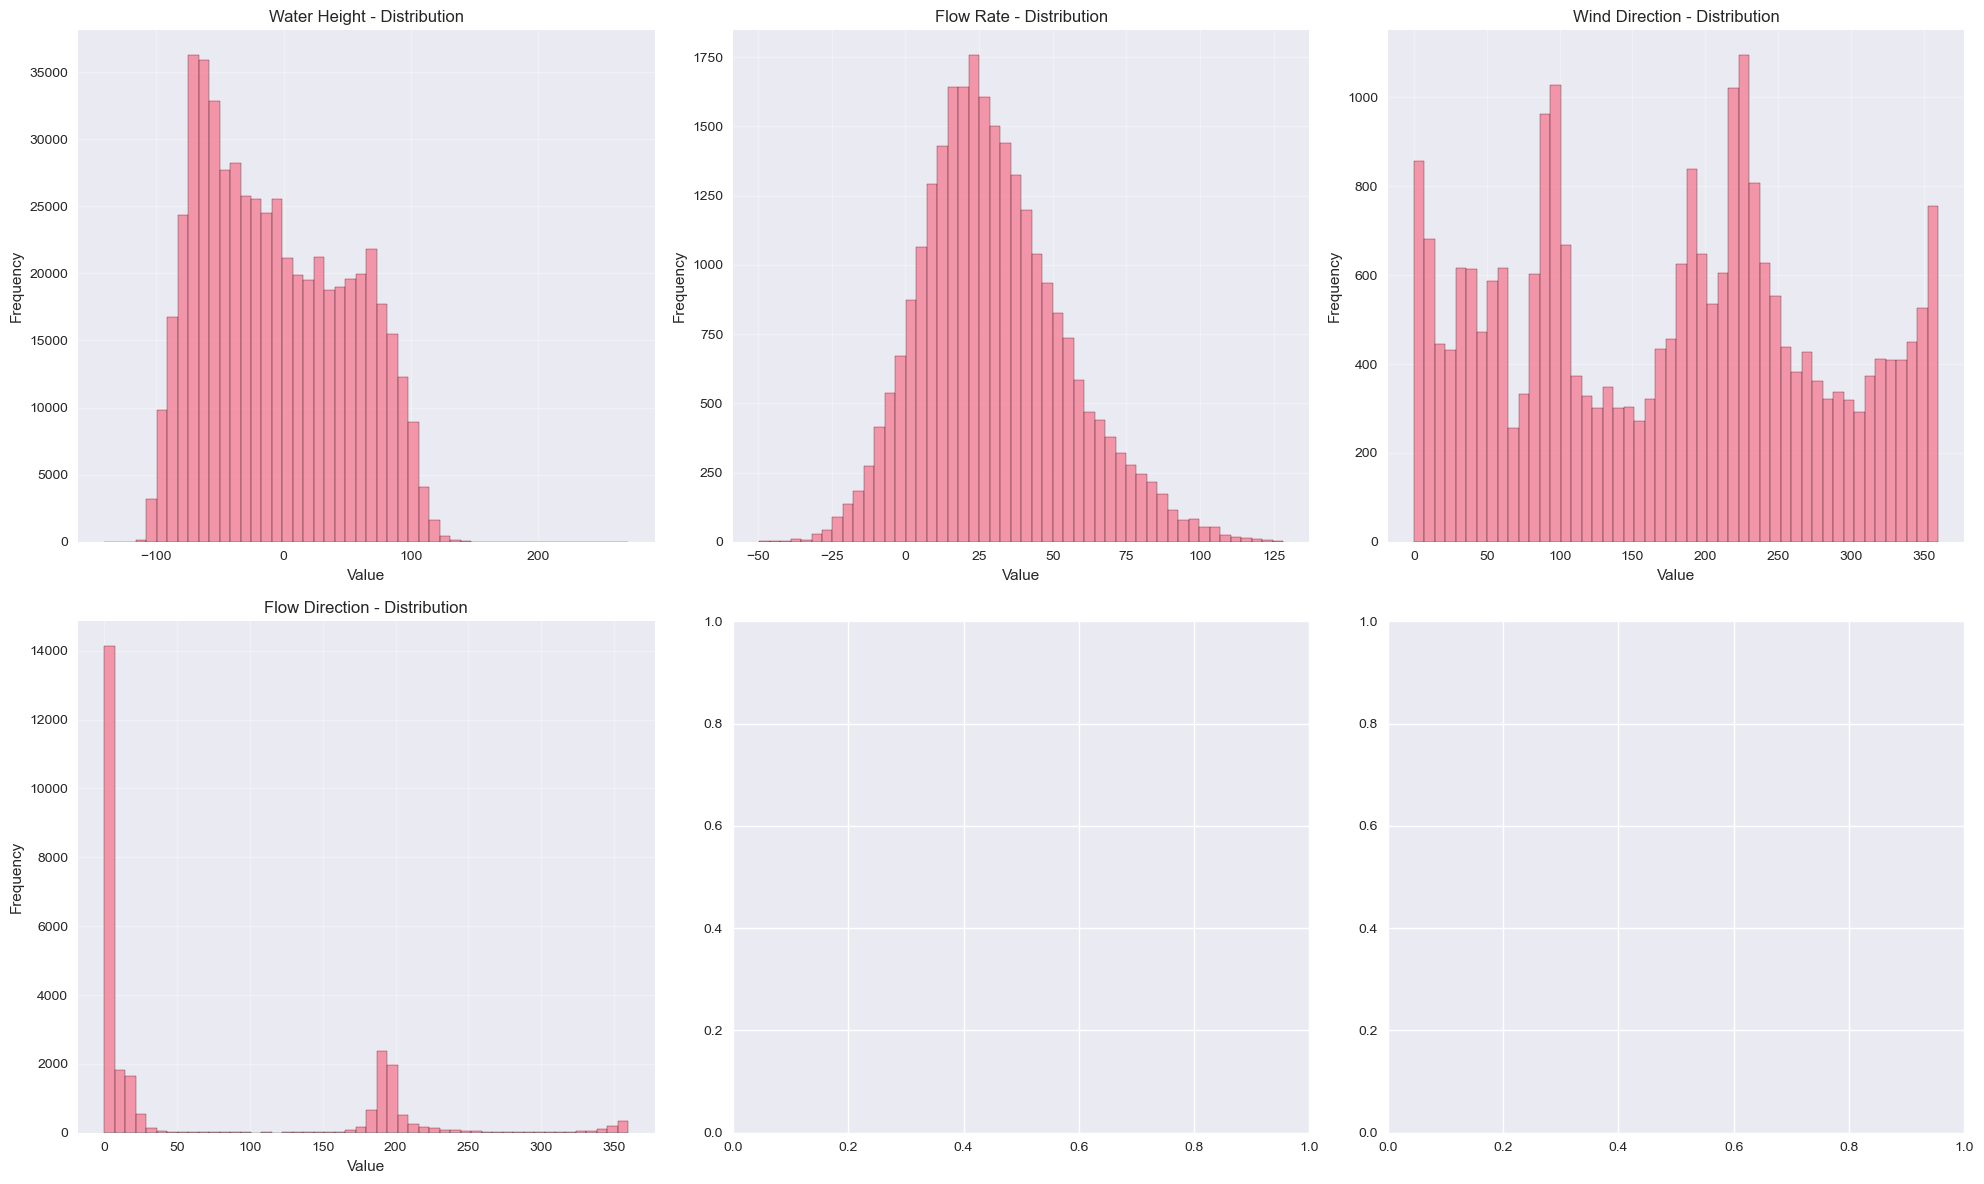

In [12]:
# Distribution plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (data_type, df) in enumerate(data_dict.items()):
    if idx >= len(axes):
        break
        
    ax = axes[idx]
    
    # Histogram
    ax.hist(df['NUMERIEKEWAARDE'], bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f'{data_type.replace("_", " ").title()} - Distribution')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()